<hr>

<div style="text-align: center;">
<h3><b>WhatsApp Group Chat Analyzer</b></h3>
<h4>IBDA1011 - Pengantar Algoritma & Pemrograman</h4>
<h4>Victor Chendra - 202000338</h4>
</div>

<hr>

In [1]:
## Requirement
# !pip install whatstk
# !pip install wordcloud


In [2]:
# Import library needed
import re
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from whatstk import df_from_txt_whatsapp
from wordcloud import WordCloud


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\victo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:

def counter(array) -> dict:
    result = {}
    for item in array:
        if item not in result:
            result[item] = 1
            continue
        result[item] += 1

    return result

def preprocessing_text(text: str):
    """
    1. Remove emoji
    2. Remove punctuation
    3. Remove stopword (Indonesia & English)
    """
    
    def remove_emoji(text):
        emoji_pattern = re.compile("["
                                   u"\U0001F600-\U0001F64F"  # emoticons
                                   u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                   u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                   u"\U0001F700-\U0001F77F"  # alchemical symbols
                                   u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                                   u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                                   u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                                   u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                                   u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                                   u"\U00002702-\U000027B0"  # Dingbats
                                   u"\U000024C2-\U0001F251" 
                                   "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)

    def remove_punctuation(text):
        words = word_tokenize(text)

        # Remove punctuation
        words_without_punct = [word for word in words if word.isalnum()]

        # Join the words back
        text_without_punct = ' '.join(words_without_punct)

        return text_without_punct

    def remove_stopwords(text):
        indonesia_stopwords = nltk.corpus.stopwords.words('indonesian') + ["sy", "sya", "ak", "kmu", "mreka", "mrka", "sdh", "udh", "udah", "adlh", "jdi", "yg", "untk", "jg", "jga"]
        english_stopwords = nltk.corpus.stopwords.words('english')

        stop_words = set(indonesia_stopwords + english_stopwords)

        # Tokenize the text into words
        words = word_tokenize(text)

        # Remove stopwords
        filtered_words = [word for word in words if word.lower() not in stop_words]

        # Join the words back
        text_without_stopwords = ' '.join(filtered_words)

        return text_without_stopwords

    text = text.replace("<This message was edited>", "")
    text = text.lower()
    clean_text = remove_emoji(text)
    clean_text = remove_punctuation(clean_text)
    clean_text = remove_stopwords(clean_text)
    
    return clean_text

def whatsapp_txt_to_dataframe(whatsapp_txt: str) -> pd.DataFrame:
    df = df_from_txt_whatsapp(filepath=whatsapp_txt)
    newcolumn = {
        'date': 'datetime',
        'username': 'username',
        'message': 'message'
    }
    df.rename(columns=newcolumn, inplace=True)
    
    # Extract year, month, date, hour, minute, and second
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['date'] = df['datetime'].dt.day
    df['hour'] = df['datetime'].dt.hour
    df['minute'] = df['datetime'].dt.minute
    df['second'] = df['datetime'].dt.second
    
    # Preprocess messages
    temp = []
    for i in range(df.shape[0]):
        temp.append(preprocessing_text(df.message[i]))
    
    df['preprocessed_message'] = temp
    
    df = df[['datetime', 'year', 'month', 'date', 'hour', 'minute', 'second', 'username', 'message', 'preprocessed_message']]
    return df


def get_chat_frequency(list_of_username: list) -> pd.DataFrame:
    temp = counter(list_of_username)
    
    result = {
        "username": [],
        "bubble_chat": []
    }
    unique_username = list(temp.keys())
    for username in unique_username:
        result["username"].append(username)
        result["bubble_chat"].append(temp[username])
    
    df = pd.DataFrame(result)
    df.sort_values(by=['bubble_chat'], ignore_index=True, ascending=False, inplace=True)
    
    return df

def get_hour_frequency(list_of_hour: int) -> pd.DataFrame:
    result = {
        "hour": ["00:00", "01:00", "02:00", "03:00", "04:00", "05:00", "06:00", "07:00", "08:00", "09:00", "10:00", "11:00", "12:00", "13:00", "14:00", "15:00", "16:00", "17:00", "18:00", "19:00", "20:00", "21:00", "22:00", "23:00"],
        "bubble_chat": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    }
    for hr in list_of_hour:
        if hr == 0:
            result["bubble_chat"][0] += 1
        elif hr == 1:
            result["bubble_chat"][1] += 1
        elif hr == 2:
            result["bubble_chat"][2] += 1
        elif hr == 3:
            result["bubble_chat"][3] += 1
        elif hr == 4:
            result["bubble_chat"][4] += 1
        elif hr == 5:
            result["bubble_chat"][5] += 1
        elif hr == 6:
            result["bubble_chat"][6] += 1
        elif hr == 7:
            result["bubble_chat"][7] += 1
        elif hr == 8:
            result["bubble_chat"][8] += 1
        elif hr == 9:
            result["bubble_chat"][9] += 1
        elif hr == 10:
            result["bubble_chat"][10] += 1
        elif hr == 11:
            result["bubble_chat"][11] += 1
        elif hr == 12:
            result["bubble_chat"][12] += 1
        elif hr == 13:
            result["bubble_chat"][13] += 1
        elif hr == 14:
            result["bubble_chat"][14] += 1
        elif hr == 15:
            result["bubble_chat"][15] += 1
        elif hr == 16:
            result["bubble_chat"][16] += 1
        elif hr == 17:
            result["bubble_chat"][17] += 1
        elif hr == 18:
            result["bubble_chat"][18] += 1
        elif hr == 19:
            result["bubble_chat"][19] += 1
        elif hr == 20:
            result["bubble_chat"][20] += 1
        elif hr == 21:
            result["bubble_chat"][21] += 1
        elif hr == 22:
            result["bubble_chat"][22] += 1
        elif hr == 23:
            result["bubble_chat"][23] += 1
        else: 
            raise KeyError("Range 00:00 - 23:00")

    df = pd.DataFrame(result)
    
    return df

def plot_chat_frequency(df_chat_frequency) -> None:
    sns.set(style="whitegrid")

    # Create a bar plot using Seaborn
    plt.figure(figsize=(10, 6))
    plot = sns.barplot(x='bubble_chat', y='username', data=df_chat_frequency, palette='viridis')

    # Add labels on the bars
    for index, value in enumerate(df_chat_frequency['bubble_chat']):
        plot.text(value, index, str(value), ha="left", va="center", fontsize=10)

    plt.xlabel('bubble_chat', fontweight="bold")
    plt.ylabel('username', fontweight="bold")
    plt.title('Chat frequency based on number of bubble chat', fontweight="bold")

    plt.show()

def plot_hour_frequency(df_hour_frequency) -> None:
    plt.figure(figsize=(12, 4))
    sns.barplot(x='hour', y='bubble_chat', data=df_hour_frequency, color="#8dd9cb")
    
    plt.title('Chat frequency by hour based on number of bubble chat', fontweight="bold")
    plt.xlabel('hour', fontweight="bold")
    plt.ylabel('bubble_chat', fontweight="bold")
    plt.xticks(rotation=45)

    plt.show()

def display_wordcloud(df, column: str):
    whole_message = ' '.join(df[column])
    wordcloud = WordCloud(width=16*90, height=9*90, background_color='white').generate(whole_message)
    plt.figure(figsize=(16, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

def barplot_word_frequency(df, column: str, n: int=20):
    whole_message = ' '.join(df[column])
    word_counts = counter(whole_message.split(" "))

    mm = pd.DataFrame(list(word_counts.items()), columns=['word', 'count'])
    mm.sort_values(by=['count'], ignore_index=True, ascending=False, inplace=True)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='word', y='count', data=mm.iloc[:n, :], palette='viridis')
    
    plt.xlabel('word', fontweight="bold")
    plt.ylabel('count', fontweight="bold")
    
    plt.xticks(rotation=45)
    plt.title('Word count', fontweight="bold")

    plt.show()


whatsapp_txt = "WhatsApp Chat with Social Work CIT x WVI.txt"
df = whatsapp_txt_to_dataframe(whatsapp_txt)
# pd.set_option('display.max_rows', None)
display(df.head(10))


,datetime,year,month,date,hour,minute,second,username,message,preprocessed_message
0,2023-11-23 10:47:00,2023,11,23,10,47,0,SD,"Selamat pagi, semuaa",selamat pagi semuaa
1,2023-11-23 10:47:00,2023,11,23,10,47,0,+62 858-9413-8807,Selamat pagi ibu,selamat pagi
2,2023-11-23 10:48:00,2023,11,23,10,48,0,SD,Saya perkenalkan di grup ini ada Mba Hana yang...,perkenalkan grup mba hana lead teman2 mahasisw...
3,2023-11-23 10:49:00,2023,11,23,10,49,0,SD,"Mba Hana, di sini ada perwakilan mahasiswa ata...",mba hana perwakilan mahasiswa nama gilbert 628...
4,2023-11-23 10:49:00,2023,11,23,10,49,0,+62 813-1406-0586,halo selamat pagi,halo selamat pagi
5,2023-11-23 10:49:00,2023,11,23,10,49,0,+62 813-1406-0586,siap mba,mba
6,2023-11-23 10:49:00,2023,11,23,10,49,0,+62 813-1406-0586,ditunggu ya,ditunggu ya
7,2023-11-23 10:49:00,2023,11,23,10,49,0,+62 813-1406-0586,terimakasih✨,terimakasih
8,2023-11-23 10:49:00,2023,11,23,10,49,0,SD,@6285894138807 dan @62895366517686 silahkan in...,6285894138807 62895366517686 silahkan invite ya
9,2023-11-23 10:58:00,2023,11,23,10,58,0,+62 858-9413-8807,Baik bu,bu


## 1. Display chat frequency by hour (based on number of bubble chat)

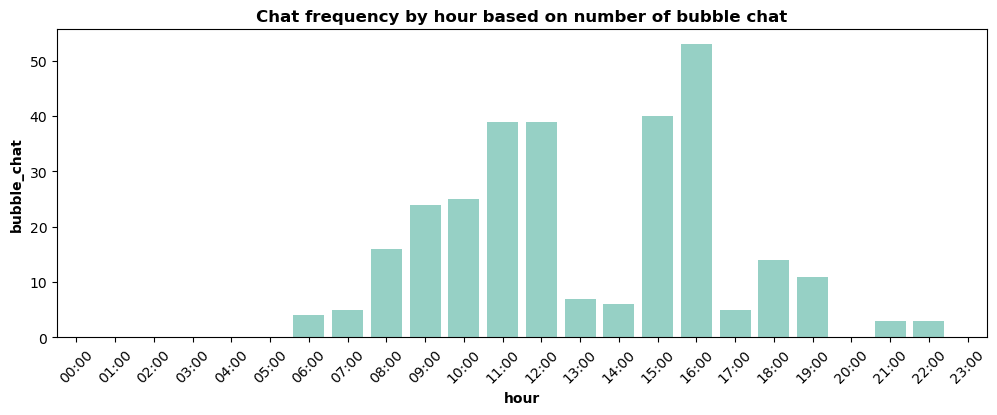

,hour,bubble_chat
0,00:00,0
1,01:00,0
2,02:00,0
3,03:00,0
4,04:00,0


In [4]:
df_hour_frequency = get_hour_frequency(df.hour)

plot_hour_frequency(df_hour_frequency)
display(df_hour_frequency.head())


## 2. Display chat frequency each user (based on number of bubble chat)

c:\Users\victo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 128241 (\N{MOBILE PHONE}) missing from current font.



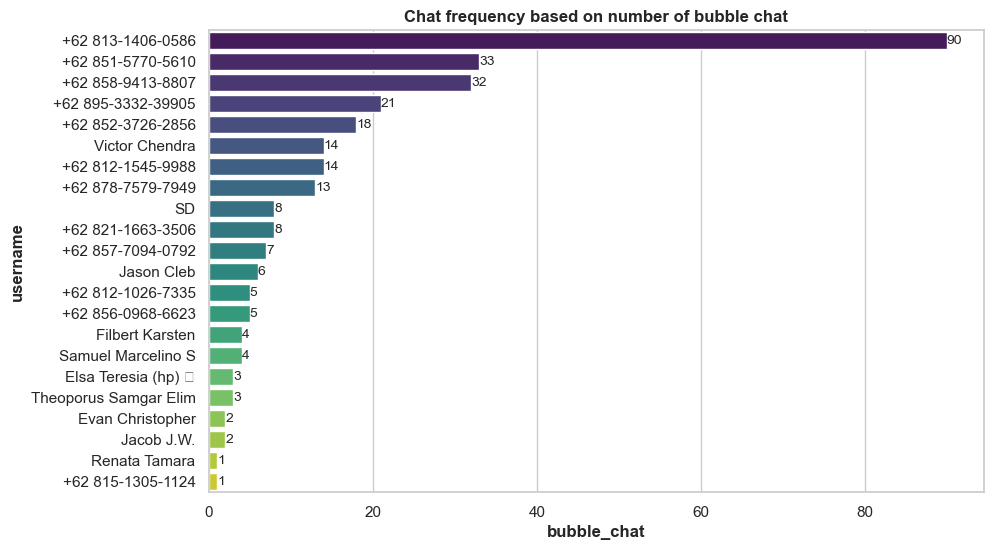

,username,bubble_chat
0,+62 813-1406-0586,90
1,+62 851-5770-5610,33
2,+62 858-9413-8807,32
3,+62 895-3332-39905,21
4,+62 852-3726-2856,18


In [5]:
df_chat_frequency = get_chat_frequency(df.username)

plot_chat_frequency(df_chat_frequency)
display(df_chat_frequency.head())


## 3. Display word frequency

### WordCloud

Raw message


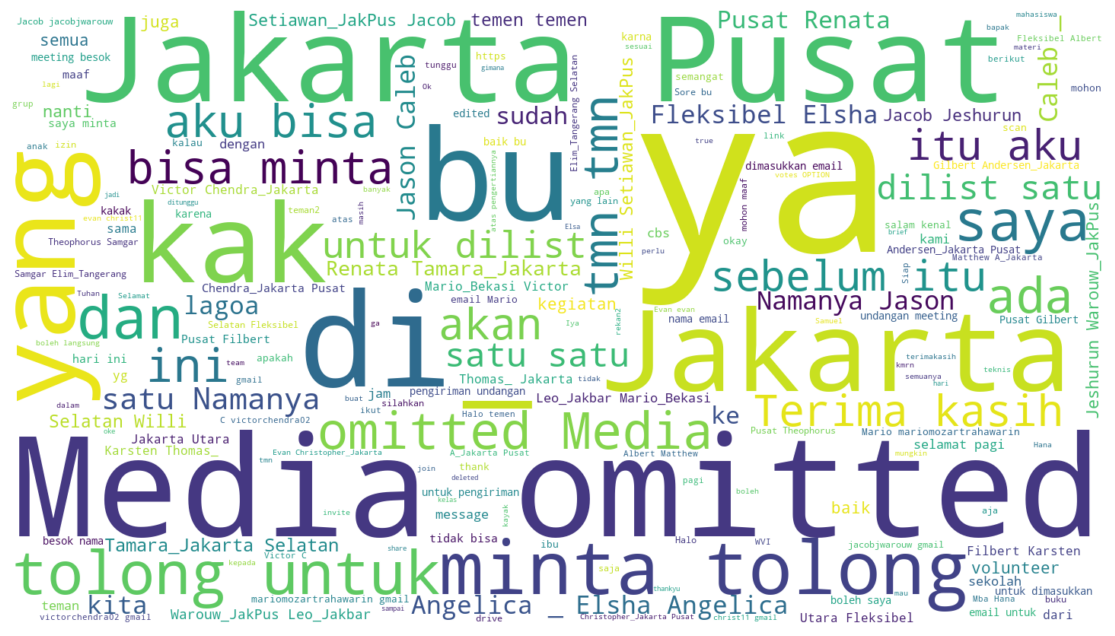

Preprocessed message


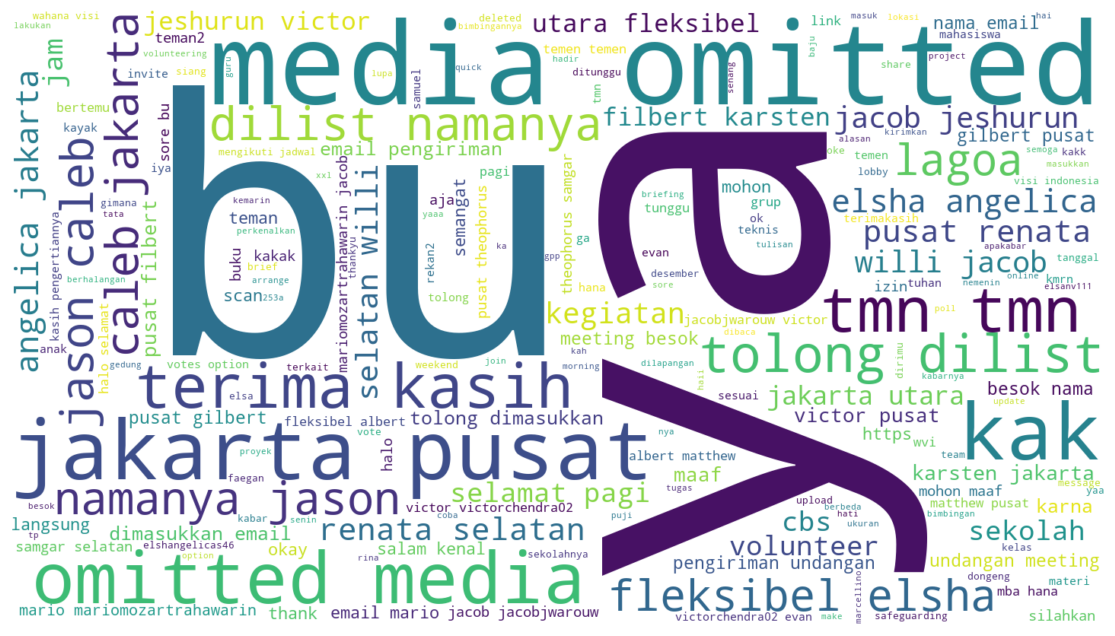

In [6]:
print("Raw message")
display_wordcloud(df, "message")

print("Preprocessed message")
display_wordcloud(df, "preprocessed_message")


### Barplot

Raw message


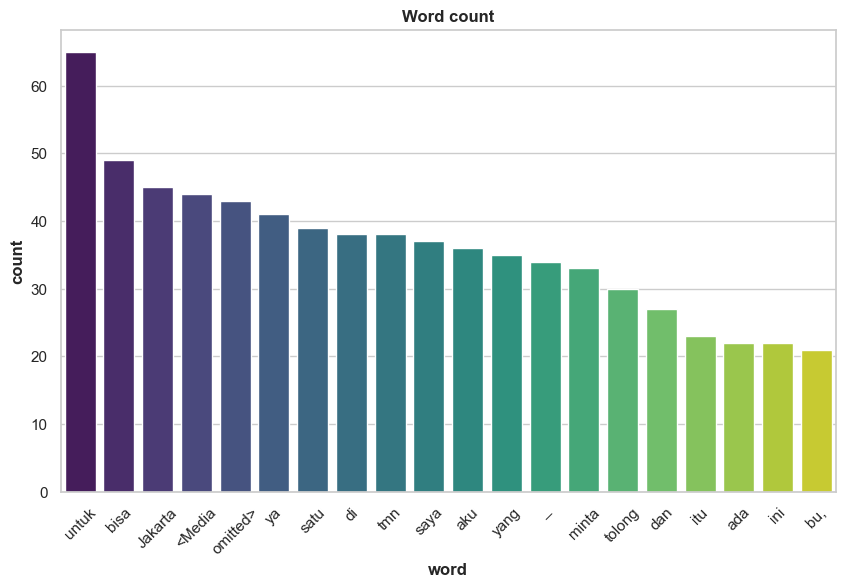

Preprocessed message


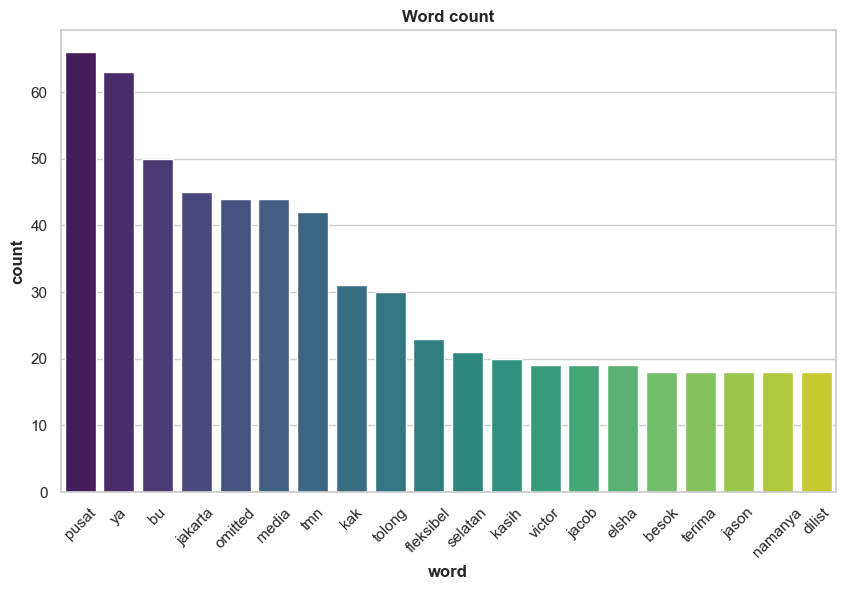

In [7]:
print("Raw message")
barplot_word_frequency(df, "message")
print("Preprocessed message")
barplot_word_frequency(df, "preprocessed_message")
